In [21]:
import fastf1 as ff1
from fastf1 import plotting
from fastf1 import utils
plotting.setup_mpl()
ff1.Cache.enable_cache('cache/')
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
from plotly.subplots import make_subplots
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
pio.templates.default = "plotly_dark"
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

NotADirectoryError: Cache directory does not exist! Please check for typos or create it first.

In [2]:
year = 2022
gp_round = 1
ses = 'R'

In [3]:
driver_1 = 'LEC'
driver_2 = 'GAS'

In [4]:
events_list = ff1.get_event_schedule(2022)[2:]

session = ff1.get_session(year, gp_round, ses)
session.load(weather=True, telemetry=True)

core           INFO 	Loading data for Bahrain Grand Prix - Race [v2.2.8]
api            INFO 	No cached data found for driver_info. Loading data...
api            INFO 	Fetching driver list...
api            INFO 	Data has been written to cache!
api            INFO 	No cached data found for timing_data. Loading data...
api            INFO 	Fetching timing data...
api            INFO 	Parsing timing data...
api            INFO 	Data has been written to cache!
api            INFO 	No cached data found for timing_app_data. Loading data...
api            INFO 	Fetching timing app data...
api            INFO 	Data has been written to cache!
core           INFO 	Processing timing data...
api            INFO 	No cached data found for session_status_data. Loading data...
api            INFO 	Fetching session status data...
api            INFO 	Data has been written to cache!
api            INFO 	No cached data found for track_status_data. Loading data...
api            INFO 	Fetching track sta

In [5]:
events_list

,RoundNumber,Country,Location,OfficialEventName,EventDate,EventName,EventFormat,Session1,Session1Date,Session2,Session2Date,Session3,Session3Date,Session4,Session4Date,Session5,Session5Date,F1ApiSupport
2,1,Bahrain,Sakhir,FORMULA 1 GULF AIR BAHRAIN GRAND PRIX 2022,2022-03-20 20:00:00,Bahrain Grand Prix,conventional,Practice 1,2022-03-18 15:00:00,Practice 2,2022-03-18 18:00:00,Practice 3,2022-03-19 15:00:00,Qualifying,2022-03-19 18:00:00,Race,2022-03-20 18:00:00,True
3,2,Saudi Arabia,Jeddah,FORMULA 1 STC SAUDI ARABIAN GRAND PRIX 2022,2022-03-27 22:00:00,Saudi Arabian Grand Prix,conventional,Practice 1,2022-03-25 17:00:00,Practice 2,2022-03-25 20:00:00,Practice 3,2022-03-26 17:00:00,Qualifying,2022-03-26 20:00:00,Race,2022-03-27 20:00:00,True
4,3,Australia,Melbourne,FORMULA 1 HEINEKEN AUSTRALIAN GRAND PRIX 2022,2022-04-10 17:00:00,Australian Grand Prix,conventional,Practice 1,2022-04-08 13:00:00,Practice 2,2022-04-08 16:00:00,Practice 3,2022-04-09 13:00:00,Qualifying,2022-04-09 16:00:00,Race,2022-04-10 15:00:00,True
5,4,Italy,Imola,FORMULA 1 ROLEX GRAN PREMIO DEL MADE IN ITALY E DELL'EMILIA-ROMAGNA 2022,2022-04-24 17:00:00,Emilia Romagna Grand Prix,sprint,Practice 1,2022-04-22 13:30:00,Qualifying,2022-04-22 17:00:00,Practice 2,2022-04-23 12:30:00,Sprint,2022-04-23 16:30:00,Race,2022-04-24 15:00:00,True
6,5,United States,Miami,FORMULA 1 CRYPTO.COM MIAMI GRAND PRIX 2022,2022-05-08 17:30:00,Miami Grand Prix,conventional,Practice 1,2022-05-06 14:30:00,Practice 2,2022-05-06 17:30:00,Practice 3,2022-05-07 13:00:00,Qualifying,2022-05-07 16:00:00,Race,2022-05-08 15:30:00,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19,18,Japan,Suzuka,FORMULA 1 JAPANESE GRAND PRIX 2022,2022-10-09 16:00:00,Japanese Grand Prix,conventional,Practice 1,2022-10-07 13:00:00,Practice 2,2022-10-07 16:00:00,Practice 3,2022-10-08 13:00:00,Qualifying,2022-10-08 16:00:00,Race,2022-10-09 14:00:00,True
20,19,United States,Austin,FORMULA 1 ARAMCO UNITED STATES GRAND PRIX 2022,2022-10-23 16:00:00,United States Grand Prix,conventional,Practice 1,2022-10-21 14:00:00,Practice 2,2022-10-21 17:00:00,Practice 3,2022-10-22 14:00:00,Qualifying,2022-10-22 17:00:00,Race,2022-10-23 14:00:00,True
21,20,Mexico,Mexico City,FORMULA 1 GRAN PREMIO DE LA CIUDAD DE MÉXICO 2022,2022-10-30 16:00:00,Mexico City Grand Prix,conventional,Practice 1,2022-10-28 13:00:00,Practice 2,2022-10-28 16:00:00,Practice 3,2022-10-29 12:00:00,Qualifying,2022-10-29 15:00:00,Race,2022-10-30 14:00:00,True
22,21,Brazil,São Paulo,FORMULA 1 HEINEKEN GRANDE PRÊMIO DE SÃO PAULO 2022,2022-11-13 17:00:00,São Paulo Grand Prix,sprint,Practice 1,2022-11-11 12:30:00,Qualifying,2022-11-11 16:00:00,Practice 2,2022-11-12 12:30:00,Sprint,2022-11-12 16:30:00,Race,2022-11-13 15:00:00,True


In [6]:
session.results

,DriverNumber,BroadcastName,Abbreviation,TeamName,TeamColor,FirstName,LastName,FullName,Position,GridPosition,Q1,Q2,Q3,Time,Status,Points
16,16,C LECLERC,LEC,Ferrari,ed1c24,Charles,Leclerc,Charles Leclerc,1.0,1.0,NaT,NaT,NaT,0 days 01:37:33.584000,Finished,26.0
55,55,C SAINZ,SAI,Ferrari,ed1c24,Carlos,Sainz,Carlos Sainz,2.0,3.0,NaT,NaT,NaT,0 days 01:37:39.182000,Finished,18.0
44,44,L HAMILTON,HAM,Mercedes,6cd3bf,Lewis,Hamilton,Lewis Hamilton,3.0,5.0,NaT,NaT,NaT,0 days 01:37:43.259000,Finished,15.0
63,63,G RUSSELL,RUS,Mercedes,6cd3bf,George,Russell,George Russell,4.0,9.0,NaT,NaT,NaT,0 days 01:37:44.795000,Finished,12.0
20,20,K MAGNUSSEN,MAG,Haas F1 Team,b6babd,Kevin,Magnussen,Kevin Magnussen,5.0,7.0,NaT,NaT,NaT,0 days 01:37:48.338000,Finished,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6,6,N LATIFI,LAT,Williams,37bedd,Nicholas,Latifi,Nicholas Latifi,16.0,20.0,NaT,NaT,NaT,0 days 01:38:35.379000,Finished,0.0
27,27,N HULKENBERG,HUL,Aston Martin,2d826d,Nico,Hulkenberg,Nico Hulkenberg,17.0,17.0,NaT,NaT,NaT,0 days 01:38:37.413000,Finished,0.0
11,11,S PEREZ,PER,Red Bull Racing,1e5bc6,Sergio,Perez,Sergio Perez,18.0,4.0,NaT,NaT,NaT,NaT,Engine,0.0
1,1,M VERSTAPPEN,VER,Red Bull Racing,1e5bc6,Max,Verstappen,Max Verstappen,19.0,2.0,NaT,NaT,NaT,NaT,Steering,0.0


In [7]:
fastest_lap = session.laps.pick_fastest()
tel = fastest_lap.telemetry
tel

,Date,SessionTime,DriverAhead,DistanceToDriverAhead,Time,RPM,Speed,nGear,Throttle,Brake,DRS,Source,Distance,RelativeDistance,Status,X,Y,Z
2,2022-03-20 16:30:01.137,0 days 02:29:01.120000,,NaN,0 days 00:00:00,11301,280,7,100,False,1,interpolation,0.046505,0.000009,OnTrack,-372,1305,-151
3,2022-03-20 16:30:01.200,0 days 02:29:01.183000,,NaN,0 days 00:00:00.063000,11321,281,7,100,False,1,pos,4.982442,0.000929,OnTrack,-375,1379,-159
4,2022-03-20 16:30:01.322,0 days 02:29:01.305000,,NaN,0 days 00:00:00.185000,11361,282,7,100,False,1,car,14.566667,0.002717,OnTrack,-369,1498,-159
5,2022-03-20 16:30:01.522,0 days 02:29:01.505000,,NaN,0 days 00:00:00.385000,11439,284,7,100,False,1,car,30.344444,0.005661,OnTrack,-362,1657,-159
6,2022-03-20 16:30:01.600,0 days 02:29:01.583000,,NaN,0 days 00:00:00.463000,11462,284,7,100,False,1,pos,36.509060,0.006811,OnTrack,-360,1709,-159
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
703,2022-03-20 16:31:35.243,0 days 02:30:35.226000,,NaN,0 days 00:01:34.106000,11200,278,7,100,False,1,car,5323.129444,0.993048,OnTrack,-396,953,-159
704,2022-03-20 16:31:35.361,0 days 02:30:35.344000,,NaN,0 days 00:01:34.224000,11257,278,7,100,False,1,pos,5332.266634,0.994752,OnTrack,-389,1088,-159
705,2022-03-20 16:31:35.483,0 days 02:30:35.466000,,NaN,0 days 00:01:34.346000,11314,279,7,100,False,1,car,5341.729444,0.996518,OnTrack,-385,1159,-158
706,2022-03-20 16:31:35.641,0 days 02:30:35.624000,,NaN,0 days 00:01:34.504000,11326,279,7,100,False,1,pos,5354.010670,0.998809,OnTrack,-383,1213,-159


In [8]:
session_weather = session.weather_data
session_weather

,Time,AirTemp,Humidity,Pressure,Rainfall,TrackTemp,WindDirection,WindSpeed
0,0 days 00:01:03.204000,25.6,17.0,1010.2,False,32.3,346,0.5
1,0 days 00:02:03.202000,25.7,17.0,1010.2,False,32.3,347,0.6
2,0 days 00:03:03.205000,25.7,17.0,1010.0,False,32.2,359,0.4
3,0 days 00:04:03.220000,25.7,17.0,1010.2,False,32.2,8,0.4
4,0 days 00:05:03.218000,25.6,17.0,1010.0,False,32.1,16,0.5
...,...,...,...,...,...,...,...,...
158,0 days 02:39:03.722000,22.4,36.0,1010.7,False,26.3,243,0.3
159,0 days 02:40:03.752000,22.3,36.0,1010.7,False,26.3,203,0.2
160,0 days 02:41:03.740000,22.3,35.0,1010.7,False,26.3,225,0.1
161,0 days 02:42:03.720000,22.3,35.0,1010.7,False,26.3,232,0.3


In [9]:
# Function to format timedelta Series as string if necessary
def format_time(timedelta_series):
    t_list_str = []
    for i in timedelta_series:
        i = str(i)
        t_list_str.append(i[10:-3])
        
    return t_list_str

In [10]:
fastest_driver_1 = session.laps.pick_driver(driver_1).pick_fastest()
fastest_driver_2 = session.laps.pick_driver(driver_2).pick_fastest()

In [11]:
car_data_1 = fastest_driver_1.get_car_data().add_distance()
car_data_1['Distance'] = round(car_data_1['Distance'])
car_data_2 = fastest_driver_2.get_car_data().add_distance()
car_data_2['Distance'] = round(car_data_2['Distance'])
# t_list_lec = format_time(t_lec)
# t_list_msc = format_time(t_msc)

In [12]:
delta_time, ref_tel, compare_tel = utils.delta_time(fastest_driver_1, fastest_driver_2)
plot_title = f"{session.event.year} {session.event.EventName} - {session.name} - {driver_1} vs {driver_2}"

In [13]:
hovertemplate_speed = 'Speed: %{y} km/h'+'<br>Distance: %{x} meters'
hovertemplate_gear = 'Gear: %{y}'+'<br>Distance: %{x} meters'
fig = make_subplots(specs=[[{"secondary_y": True}]])

fig.add_trace(go.Scatter(x=car_data_1['Distance'], y=car_data_1['Speed'], name=driver_1, line_color=ff1.plotting.driver_color(driver_1), hovertemplate = hovertemplate_speed, opacity=0.8), secondary_y=False)
fig.add_trace(go.Scatter(x=car_data_2['Distance'], y=car_data_2['Speed'], name=driver_2, line_color=ff1.plotting.driver_color(driver_2), hovertemplate = hovertemplate_speed, opacity=0.8), secondary_y=False)
fig.add_trace(go.Scatter(x=ref_tel['Distance'], y=delta_time, line_color='white', name='Delta Time', hovertemplate = 'Delta Time: %{y:.3f} sec', opacity=0.8, line_width=1), secondary_y=True)

fig.update_yaxes(title_text="Speed (km/h)", secondary_y=False)
fig.update_yaxes(title_text=f"<-- {driver_2} ahead | {driver_1} ahead -->", secondary_y=True)
fig.update_layout(width=1000, height=600, title_text=plot_title, xaxis_title='Distance (m)', title_x=0.5)
fig.show()

In [14]:
fig = make_subplots(rows=3, cols=1, shared_xaxes=True, subplot_titles=('Speed', 'Gear', 'Delta Time'), vertical_spacing=0.1)

fig.append_trace(go.Scatter(x=car_data_1['Distance'], y=car_data_1['Speed'], name=driver_1, line_color=ff1.plotting.driver_color(driver_1), hovertemplate = hovertemplate_speed, opacity=0.8), 1, 1)
fig.append_trace(go.Scatter(x=car_data_2['Distance'], y=car_data_2['Speed'], name=driver_2, line_color=ff1.plotting.driver_color(driver_2), hovertemplate = hovertemplate_speed, opacity=0.8), 1, 1)

fig.append_trace(go.Scatter(x=car_data_1['Distance'], y=car_data_1['nGear'], name=driver_1, line_color=ff1.plotting.driver_color(driver_1), hovertemplate = hovertemplate_gear, opacity=0.8, showlegend=False), 2, 1)
fig.append_trace(go.Scatter(x=car_data_2['Distance'], y=car_data_2['nGear'], name=driver_2, line_color=ff1.plotting.driver_color(driver_2), hovertemplate = hovertemplate_gear, opacity=0.8, showlegend=False), 2, 1)

fig.append_trace(go.Scatter(x=ref_tel['Distance'], y=delta_time, line_color='white', mode='lines', name='Delta Time', hovertemplate = 'Delta Time: %{y:.3f} sec', opacity=0.8), 3, 1)

fig.update_yaxes(title_text="Speed (km/h)", row=1, col=1)
fig.update_yaxes(title_text="Gear", row=2, col=1)
fig.update_yaxes(title_text=f"<-- {driver_2} ahead | {driver_1} ahead -->", row=3, col=1)
fig.update_xaxes(title_text="Distance (m)", row=3, col=1)

fig.update_layout(width=1200, height=1200, title_text=plot_title, title_x=0.1)
fig.show()

In [15]:
# Returns only laps quicker than 107% of the quickest lap of the session, removing outlaps and inlaps.
session.laps.pick_quicklaps()

,Time,DriverNumber,LapTime,LapNumber,Stint,PitOutTime,PitInTime,Sector1Time,Sector2Time,Sector3Time,...,IsPersonalBest,Compound,TyreLife,FreshTyre,LapStartTime,Team,Driver,TrackStatus,IsAccurate,LapStartDate
1,0 days 01:05:52.109000,16,0 days 00:01:37.853000,2,1,NaT,NaT,0 days 00:00:31.582000,0 days 00:00:42.159000,0 days 00:00:24.112000,...,False,SOFT,2.0,True,0 days 01:04:14.256000,Ferrari,LEC,1,True,2022-03-20 15:05:14.273
2,0 days 01:07:30.381000,16,0 days 00:01:38.272000,3,1,NaT,NaT,0 days 00:00:31.635000,0 days 00:00:42.404000,0 days 00:00:24.233000,...,False,SOFT,3.0,True,0 days 01:05:52.109000,Ferrari,LEC,1,True,2022-03-20 15:06:52.126
3,0 days 01:09:08.795000,16,0 days 00:01:38.414000,4,1,NaT,NaT,0 days 00:00:31.619000,0 days 00:00:42.482000,0 days 00:00:24.313000,...,False,SOFT,4.0,True,0 days 01:07:30.381000,Ferrari,LEC,1,True,2022-03-20 15:08:30.398
4,0 days 01:10:47.266000,16,0 days 00:01:38.471000,5,1,NaT,NaT,0 days 00:00:31.590000,0 days 00:00:42.565000,0 days 00:00:24.316000,...,False,SOFT,5.0,True,0 days 01:09:08.795000,Ferrari,LEC,1,True,2022-03-20 15:10:08.812
5,0 days 01:12:25.978000,16,0 days 00:01:38.712000,6,1,NaT,NaT,0 days 00:00:31.627000,0 days 00:00:42.652000,0 days 00:00:24.433000,...,False,SOFT,6.0,True,0 days 01:10:47.266000,Ferrari,LEC,1,True,2022-03-20 15:11:47.283
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1118,0 days 02:09:55.703000,10,0 days 00:01:38.204000,40,3,NaT,NaT,0 days 00:00:31.492000,0 days 00:00:42.613000,0 days 00:00:24.099000,...,False,HARD,9.0,True,0 days 02:08:17.499000,AlphaTauri,GAS,1,True,2022-03-20 16:09:17.516
1119,0 days 02:11:34.004000,10,0 days 00:01:38.301000,41,3,NaT,NaT,0 days 00:00:31.523000,0 days 00:00:42.621000,0 days 00:00:24.157000,...,False,HARD,10.0,True,0 days 02:09:55.703000,AlphaTauri,GAS,1,True,2022-03-20 16:10:55.720
1120,0 days 02:13:12.333000,10,0 days 00:01:38.329000,42,3,NaT,NaT,0 days 00:00:31.453000,0 days 00:00:42.692000,0 days 00:00:24.184000,...,False,HARD,11.0,True,0 days 02:11:34.004000,AlphaTauri,GAS,1,True,2022-03-20 16:12:34.021
1121,0 days 02:14:50.811000,10,0 days 00:01:38.478000,43,3,NaT,NaT,0 days 00:00:31.468000,0 days 00:00:42.816000,0 days 00:00:24.194000,...,False,HARD,12.0,True,0 days 02:13:12.333000,AlphaTauri,GAS,1,True,2022-03-20 16:14:12.350


In [16]:
lap_1 = fastest_driver_1.telemetry
lap_1

,Date,SessionTime,DriverAhead,DistanceToDriverAhead,Time,RPM,Speed,nGear,Throttle,Brake,DRS,Source,Distance,RelativeDistance,Status,X,Y,Z
2,2022-03-20 16:30:01.137,0 days 02:29:01.120000,,NaN,0 days 00:00:00,11301,280,7,100,False,1,interpolation,0.046505,0.000009,OnTrack,-372,1305,-151
3,2022-03-20 16:30:01.200,0 days 02:29:01.183000,,NaN,0 days 00:00:00.063000,11321,281,7,100,False,1,pos,4.982442,0.000929,OnTrack,-375,1379,-159
4,2022-03-20 16:30:01.322,0 days 02:29:01.305000,,NaN,0 days 00:00:00.185000,11361,282,7,100,False,1,car,14.566667,0.002717,OnTrack,-369,1498,-159
5,2022-03-20 16:30:01.522,0 days 02:29:01.505000,,NaN,0 days 00:00:00.385000,11439,284,7,100,False,1,car,30.344444,0.005661,OnTrack,-362,1657,-159
6,2022-03-20 16:30:01.600,0 days 02:29:01.583000,,NaN,0 days 00:00:00.463000,11462,284,7,100,False,1,pos,36.509060,0.006811,OnTrack,-360,1709,-159
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
703,2022-03-20 16:31:35.243,0 days 02:30:35.226000,,NaN,0 days 00:01:34.106000,11200,278,7,100,False,1,car,5323.129444,0.993048,OnTrack,-396,953,-159
704,2022-03-20 16:31:35.361,0 days 02:30:35.344000,,NaN,0 days 00:01:34.224000,11257,278,7,100,False,1,pos,5332.266634,0.994752,OnTrack,-389,1088,-159
705,2022-03-20 16:31:35.483,0 days 02:30:35.466000,,NaN,0 days 00:01:34.346000,11314,279,7,100,False,1,car,5341.729444,0.996518,OnTrack,-385,1159,-158
706,2022-03-20 16:31:35.641,0 days 02:30:35.624000,,NaN,0 days 00:01:34.504000,11326,279,7,100,False,1,pos,5354.010670,0.998809,OnTrack,-383,1213,-159


In [17]:
colormap_speed = mpl.cm.RdYlGn
colormap_gear = mpl.cm.get_cmap('RdYlGn', 8)
points = np.array([lap_1['X'], lap_1['Y']]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)
px = 1/plt.rcParams['figure.dpi']

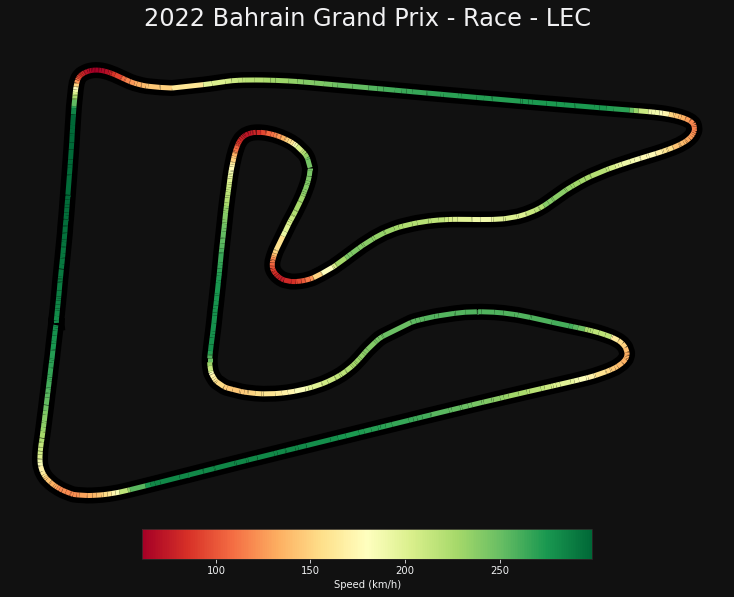

In [18]:
fig, ax = plt.subplots(sharex=True, sharey=True, figsize=(900*px, 600*px))
fig.suptitle(f"{session.event.year} {session.event.EventName} - {session.name} - {driver_1}", size=24, y=0.97)

# Adjust margins and turn of axis
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.12)
ax.axis('off')

# After this, we plot the data itself.
# Create background track line
ax.plot(lap_1['X'], lap_1['Y'], color='black', linestyle='-', linewidth=16, zorder=0)

# Create a continuous norm to map from data points to colors
norm = plt.Normalize(lap_1['Speed'].min(), lap_1['Speed'].max())
lc = LineCollection(segments, cmap=colormap_speed, norm=norm, linestyle='-', linewidth=5)

# Set the values used for colormapping
lc.set_array(lap_1['Speed'])

# Merge all line segments together
line = ax.add_collection(lc)

# Finally, we create a color bar as a legend.
cbaxes = fig.add_axes([0.25, 0.05, 0.5, 0.05])
normlegend = mpl.colors.Normalize(vmin=lap_1['Speed'].min(), vmax=lap_1['Speed'].max())
legend = mpl.colorbar.ColorbarBase(cbaxes, norm=normlegend, cmap=colormap_speed, orientation="horizontal", label='Speed (km/h)')

# Set background color to transparent
# fig.patch.set_alpha(0)
fig.patch.set_facecolor('#111111')

# Show the plot
plt.show()

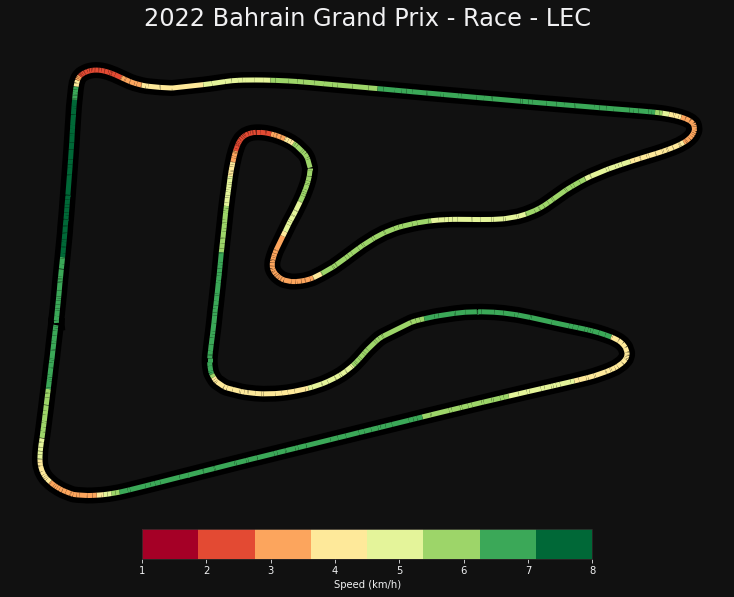

In [19]:
fig, ax = plt.subplots(sharex=True, sharey=True, figsize=(900*px, 600*px))
fig.suptitle(f"{session.event.year} {session.event.EventName} - {session.name} - {driver_1}", size=24, y=0.97)

# Adjust margins and turn of axis
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.12)
ax.axis('off')

# After this, we plot the data itself.
# Create background track line
ax.plot(lap_1['X'], lap_1['Y'], color='black', linestyle='-', linewidth=16, zorder=0)

# Create a norm to map from data points to colors
norm = plt.Normalize(1, colormap_gear.N+1)
lc = LineCollection(segments, cmap=colormap_gear, norm=norm, linestyle='-', linewidth=5)

# Set the values used for colormapping
lc.set_array(lap_1['nGear'].to_numpy().astype(float))

# Merge all line segments together
line = ax.add_collection(lc)

# Create a color bar as a legend
cbaxes = fig.add_axes([0.25, 0.05, 0.5, 0.05])
normlegend = mpl.colors.Normalize(vmin=1, vmax=8)
legend = mpl.colorbar.ColorbarBase(cbaxes, norm=normlegend, cmap=colormap_gear, orientation="horizontal", label='Speed (km/h)')

# Set background color to transparent
# fig.patch.set_alpha(0)
fig.patch.set_facecolor('#111111')

# Show the plot
plt.show()